In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

In [3]:
data_path="drug200.csv"

In [5]:
df=pd.read_csv(data_path)

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
for col in df.columns:
    print(df[col].value_counts(),"\n")

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64 

Sex
M    104
F     96
Name: count, dtype: int64 

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 

Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64 

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 



In [15]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True, dtype=int)

In [17]:
class_BP=["LOW","NORMAL","HIGH"]
class_Cholesterol=["NORMAL","HIGH"]

In [19]:
encoder = OrdinalEncoder(categories=[class_BP,class_Cholesterol])

df[["BP", "Cholesterol"]] = encoder.fit_transform(df[["BP", "Cholesterol"]]).astype(int)


In [21]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,2,1,25.355,drugY,0
1,47,0,1,13.093,drugC,1
2,47,0,1,10.114,drugC,1
3,28,1,1,7.798,drugX,0
4,61,0,1,18.043,drugY,0


In [23]:
le=LabelEncoder()

In [25]:
df["Drug"]=le.fit_transform(df["Drug"])

In [27]:
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,2,1,25.355,4,0
1,47,0,1,13.093,2,1
2,47,0,1,10.114,2,1
3,28,1,1,7.798,3,0
4,61,0,1,18.043,4,0


In [29]:
print(le.classes_)

['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [52]:
param={

    "criterion" : ["gini","entropy","log_loss"],
    "splitter": ["best","random"],
    "max_depth": [1,2,3,4,5,42,None],
    "max_features" : ["sqrt","log2",None]
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring="accuracy")

In [58]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 42, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [60]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}

In [62]:
y_pred=grid.predict(X_test)

In [64]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



[Text(0.6666666666666666, 0.9, 'x[3] <= 14.829\ngini = 0.692\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 1.5\ngini = 0.676\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[1] <= 0.5\ngini = 0.34\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.2222222222222222, 0.3, 'x[2] <= 0.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.495\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.7

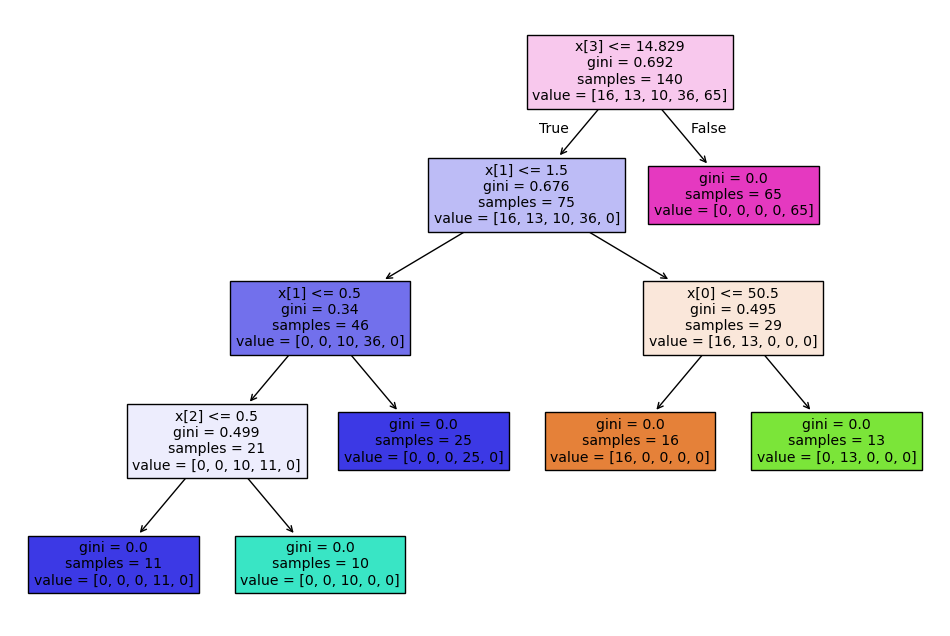

In [66]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train,y_train),filled=True)